# Iris

We are given a dataset in which are registered flowers and their caracteristics.
We have to classify the said flowers in different groups thanks to machine learning.

# Summary

* Sepal length, width and species correlation
* Petal length, width and species correlation
* Correlation box

# Library used

In [95]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Importing the data

In [96]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Missing values

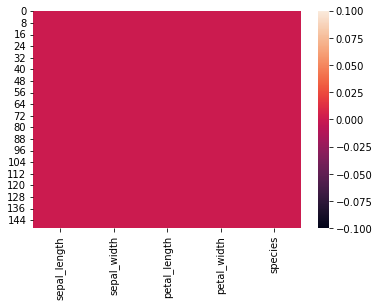

In [97]:
sns.heatmap(data.isnull())
plt.show()

In [98]:
(data.isnull().sum()/data.shape[0])*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

The dataset is filled, we can use it safely with no need of cleaning.

# Sepal length, width and species correlation

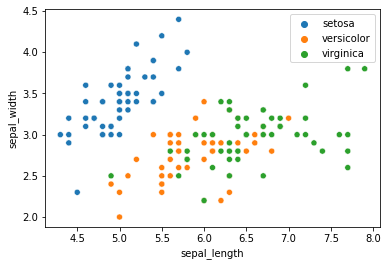

In [99]:
sepal_species_fig = sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title("")
plt.show()

By studying the sepal length and width, we can see Iris-setosa clearly distinguish itself from the rest, however the two species left are quite mixed and hard to differentiate.

# Petal length, width and species correlation

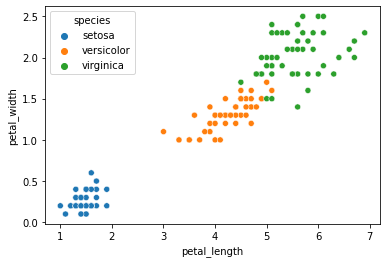

In [100]:
petal_species_fig = sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species')
plt.show()

We clearly distinguish clusters depending on the petal length and width : they represent the 3 different species

# Correlation box

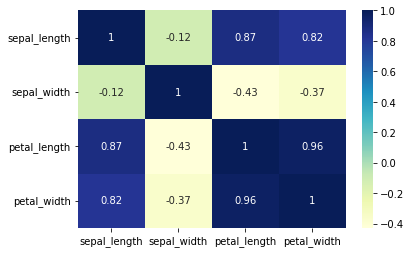

In [101]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

With this correlation box, we can see a big correlation between petals and sepals length, not so much between sepal width and the rest.